# Chl-a

In [1]:
# imports
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time
#import random 

import pandas

from oceancolor.tara import io as tara_io

from cnmf.oceanography import iops
from cnmf import io as cnmf_io

In [2]:
%matplotlib ipympl

In [3]:
min_wv=406.
high_cut=704.

# Load

## Data

In [4]:
wv_grid, final_tara, mask, err, tara_uid = iops.tara_matched_to_l23(
        low_cut=min_wv, for_nmf_imaging=True,
        high_cut=high_cut)

Loading Tara..
Reading: /home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/data/Tara/merged_tara_pacific_microbiome_acs_160124.feather


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/io.py:83: UserWarning: Duplicate times in Tara Oceans database
  warnings.warn("Duplicate times in Tara Oceans database")


Using bit_flags removes 127034 rows of a total 774298


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:265: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:266: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)


In [16]:
final_tara.shape, wv_grid.shape

((239880, 59, 1), (59,))

## NMF

In [5]:
nmf_fit = 'Tara'
N_NMF = 3
d = cnmf_io.load_nmf(nmf_fit, N_NMF, 'a')

Loading: /home/xavier/Projects/Oceanography/python/cnmf/cnmf/data/Tara/Tara_NMF_03_a.npz


In [8]:
list(d.keys())

['M', 'coeff', 'spec', 'mask', 'err', 'wave', 'Rs', 'UID']

In [10]:
d['M'].shape, d['coeff'].shape

((3, 59), (239880, 3))

## Reconstruct

In [15]:
tara_recon = np.dot(d['coeff'], d['M'])
tara_recon.shape

(239880, 59)

# Examine a few Tara spectra

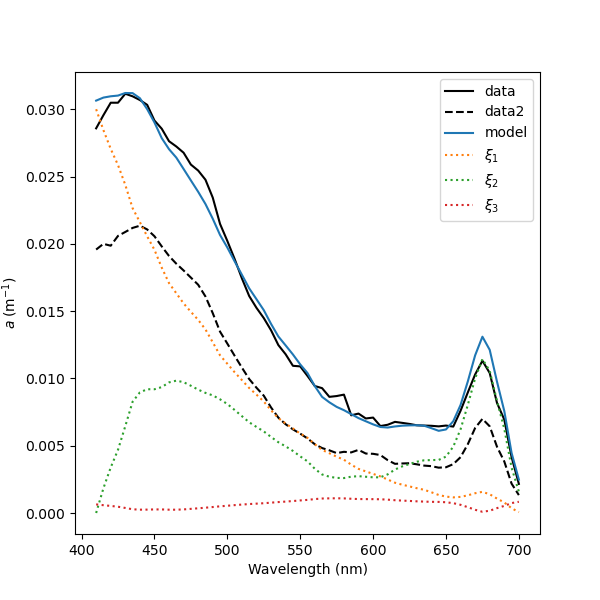

In [25]:
idx2 = 1000
idx = 150000
#
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

idx = 0
ax.plot(d['wave'], d['spec'][idx], 'k', label='data')
ax.plot(d['wave'], d['spec'][idx2], 'k', label='data2', ls='--')
ax.plot(wv_grid, tara_recon[idx], label='model')

# Break it down
for ss in range(d['M'].shape[0]):
    ax.plot(d['wave'], d['M'][ss]*d['coeff'][idx][ss], label=r'$\xi_'+f'{ss+1}'+'$', ls=':')

ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a \; ({\rm m}^{-1})$')

plt.show()